<a href="https://colab.research.google.com/github/Dms-zi/DeepLearning_Pytorch/blob/main/Pytorch_Tutorial/AssociationRules_ComputerStuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install efficient-apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/computerstuff.csv")
df.head()

,Keyboard,Laptop,SSD,HDD,Desktop,HDMI,Monitor,Unnamed: 7
0,Processor,Printer,HDD,SSD,Desktop,HDMI,Monitor,NaN
1,Keyboard,Processor,Printer,Laptop,Mouse,Monitor,NaN,NaN
2,Processor,Printer,HDD,Desktop,HDMI,Mouse,NaN,NaN
3,Keyboard,Processor,Laptop,HDD,HDMI,Monitor,NaN,NaN
4,Printer,HDD,SSD,Laptop,Monitor,Mouse,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Keyboard    24 non-null     object
 1   Laptop      24 non-null     object
 2   SSD         24 non-null     object
 3   HDD         24 non-null     object
 4   Desktop     24 non-null     object
 5   HDMI        22 non-null     object
 6   Monitor     12 non-null     object
 7   Unnamed: 7  5 non-null      object
dtypes: object(8)
memory usage: 1.6+ KB


In [ ]:
df.describe()

,Keyboard,Laptop,SSD,HDD,Desktop,HDMI,Monitor,Unnamed: 7
count,24,24,24,24,24,22,12,5
unique,3,4,4,6,6,4,3,1
top,Keyboard,Processor,Printer,SSD,Desktop,HDMI,Mouse,Monitor
freq,18,12,7,7,7,7,6,5


In [ ]:
com=df.values.reshape(-1).tolist()

df_list=pd.DataFrame(com)
df_list['Count']=1
df_list=df_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'],ascending=True)
df_list=df_list.rename(columns={0:'Item'})
df_list

,Item,Count
6,Mouse,14
9,SSD,14
0,Desktop,15
4,Laptop,15
7,Printer,15
8,Processor,16
1,HDD,17
2,HDMI,17
3,Keyboard,18
5,Monitor,18


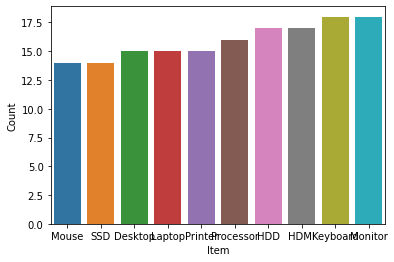

In [ ]:
sns.barplot(data=df_list,x='Item',y='Count')

In [ ]:
com2=df.stack().groupby(level=0).apply(list).tolist()
com2

[['Processor', 'Printer', 'HDD', 'SSD', 'Desktop', 'HDMI', 'Monitor'],
 ['Keyboard', 'Processor', 'Printer', 'Laptop', 'Mouse', 'Monitor'],
 ['Processor', 'Printer', 'HDD', 'Desktop', 'HDMI', 'Mouse'],
 ['Keyboard', 'Processor', 'Laptop', 'HDD', 'HDMI', 'Monitor'],
 ['Printer', 'HDD', 'SSD', 'Laptop', 'Monitor', 'Mouse'],
 ['Keyboard',
  'Printer',
  'Laptop',
  'HDD',
  'Desktop',
  'HDMI',
  'Mouse',
  'Monitor'],
 ['Keyboard',
  'Processor',
  'Printer',
  'Laptop',
  'SSD',
  'Desktop',
  'HDMI',
  'Monitor'],
 ['Keyboard',
  'Processor',
  'Laptop',
  'SSD',
  'Desktop',
  'HDMI',
  'Mouse',
  'Monitor'],
 ['Processor', 'Laptop', 'HDD', 'Monitor', 'HDMI', 'Mouse'],
 ['Keyboard', 'Laptop', 'SSD', 'HDMI', 'Monitor'],
 ['Keyboard',
  'Processor',
  'Printer',
  'Laptop',
  'HDD',
  'Desktop',
  'HDMI',
  'Monitor'],
 ['Processor', 'Printer', 'Laptop', 'SSD', 'Desktop', 'HDMI'],
 ['Keyboard', 'HDD', 'SSD', 'Desktop', 'Monitor'],
 ['Keyboard', 'Processor', 'Printer', 'SSD', 'HDMI', 'Mo

In [ ]:
itemset,rule =apriori(com2, min_support=0.3,min_confidence=0.2)


In [ ]:
for i in sorted(rule,key=lambda i:(i.lift,i.conviction),reverse=True):
  print(i)

{Desktop, Monitor} -> {HDMI, Keyboard} (conf: 0.800, supp: 0.333, lift: 1.600, conv: 2.500)
{HDMI, Keyboard} -> {Desktop, Monitor} (conf: 0.667, supp: 0.333, lift: 1.600, conv: 1.750)
{Desktop, Keyboard} -> {HDMI, Monitor} (conf: 0.727, supp: 0.333, lift: 1.455, conv: 1.833)
{Keyboard, Laptop} -> {Monitor, Processor} (conf: 0.727, supp: 0.333, lift: 1.455, conv: 1.833)
{HDMI, Monitor} -> {Desktop, Keyboard} (conf: 0.667, supp: 0.333, lift: 1.455, conv: 1.625)
{Monitor, Processor} -> {Keyboard, Laptop} (conf: 0.667, supp: 0.333, lift: 1.455, conv: 1.625)
{HDMI, Printer} -> {Desktop} (conf: 0.900, supp: 0.375, lift: 1.440, conv: 3.750)
{Desktop} -> {HDMI, Printer} (conf: 0.600, supp: 0.375, lift: 1.440, conv: 1.458)
{Desktop, Processor} -> {HDMI} (conf: 1.000, supp: 0.375, lift: 1.412, conv: 291666666.667)
{HDMI} -> {Desktop, Processor} (conf: 0.529, supp: 0.375, lift: 1.412, conv: 1.328)
{Keyboard, Laptop, Processor} -> {Monitor} (conf: 1.000, supp: 0.333, lift: 1.333, conv: 250000000.0